In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import *

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
spark = SparkSession.builder.appName('AmazonEbookvsBookReviews').getOrCreate()

#change configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '4g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','4g')])

#print spark configuration settings
spark.sparkContext.getConf().getAll()

[('spark.eventLog.enabled', 'true'),
 ('spark.yarn.jars',
  'local:/opt/cloudera/parcels/CDH-6.3.0-1.cdh6.3.0.p0.1279813/lib/spark/jars/*,local:/opt/cloudera/parcels/CDH-6.3.0-1.cdh6.3.0.p0.1279813/lib/spark/hive/*'),
 ('spark.yarn.appMasterEnv.MKL_NUM_THREADS', '1'),
 ('spark.app.id', 'application_1643652317966_4589'),
 ('spark.ui.proxyBase', '/proxy/application_1643652317966_4589'),
 ('spark.sql.queryExecutionListeners',
  'com.cloudera.spark.lineage.NavigatorQueryListener'),
 ('spark.org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter.param.PROXY_URI_BASES',
  'http://md01.rcc.local:8088/proxy/application_1643652317966_4589,http://md02.rcc.local:8088/proxy/application_1643652317966_4589'),
 ('spark.lineage.log.dir', '/var/log/spark/lineage'),
 ('spark.org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter.param.PROXY_HOSTS',
  'md01.rcc.local,md02.rcc.local'),
 ('spark.serializer', 'org.apache.spark.serializer.KryoSerializer'),
 ('spark.executorEnv.PYTHONPATH',
  '/opt/cl

In [4]:
#Reading in Ebook File
dfebook = spark.read.option("sep","\t").csv("/user/klaurens/project/project/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv", inferSchema=True, header=True)

In [5]:
#Reading in Book File
dfbook = spark.read.option("sep","\t").csv("/user/klaurens/project/project/amazon_reviews_us_Books_v1_02.tsv", inferSchema=True, header=True)

## Data Exploration

In [6]:
dfebook.dtypes

[('marketplace', 'string'),
 ('customer_id', 'int'),
 ('review_id', 'string'),
 ('product_id', 'string'),
 ('product_parent', 'int'),
 ('product_title', 'string'),
 ('product_category', 'string'),
 ('star_rating', 'int'),
 ('helpful_votes', 'int'),
 ('total_votes', 'int'),
 ('vine', 'string'),
 ('verified_purchase', 'string'),
 ('review_headline', 'string'),
 ('review_body', 'string'),
 ('review_date', 'timestamp')]

In [7]:
dfbook.dtypes

[('marketplace', 'string'),
 ('customer_id', 'int'),
 ('review_id', 'string'),
 ('product_id', 'string'),
 ('product_parent', 'int'),
 ('product_title', 'string'),
 ('product_category', 'string'),
 ('star_rating', 'int'),
 ('helpful_votes', 'int'),
 ('total_votes', 'int'),
 ('vine', 'string'),
 ('verified_purchase', 'string'),
 ('review_headline', 'string'),
 ('review_body', 'string'),
 ('review_date', 'timestamp')]

## The Number of Review per Star Rating Book vs EBook

In [9]:
df1 = dfebook.groupby("star_rating").count()
df1.show()
pandasdf1 = df1.toPandas()
df2 = dfbook.groupby("star_rating").count()
df2.show()
pandasdf2 = df2.toPandas()

+-----------+-------+
|star_rating|  count|
+-----------+-------+
|       null|     17|
|          1| 261726|
|          3| 481926|
|          5|2952613|
|          4|1177120|
|          2| 228291|
+-----------+-------+

+-----------+-------+
|star_rating|  count|
+-----------+-------+
|       null|      5|
|          1| 238221|
|          3| 249925|
|          5|1864804|
|          4| 586181|
|          2| 166384|
+-----------+-------+



[Text(0.5,1,'Ebook Star Rating Count')]

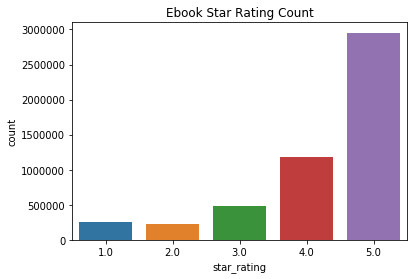

In [13]:
import seaborn as sns
sns.barplot(x = 'star_rating', y = 'count', data = pandasdf1).set(title='Ebook Star Rating Count')

[Text(0.5,1,'Book Star Rating Count')]

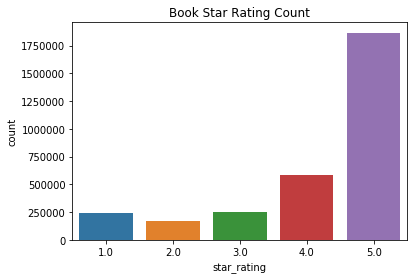

In [14]:
sns.barplot(x = 'star_rating', y = 'count', data = pandasdf2).set(title='Book Star Rating Count')

## Top 20 most reviewed Book vs EBook

In [46]:
df1 = dfebook.groupby("product_id","product_title").count().sort("count").orderBy(["count"], ascending=[0]).show(20)
df1.show()
pandasdf1 = df1.toPandas()

+----------+--------------------+-----+
|product_id|       product_title|count|
+----------+--------------------+-----+
|B007J4T2G8|Fifty Shades of G...|11873|
|B002MQYOFW|The Hunger Games ...|11714|
|B006LSZECO|  Gone Girl: A Novel| 9437|
|B003O86FMW|Catching Fire (Hu...| 7983|
|B003XF1XOQ|Mockingjay (Hunge...| 7429|
|B00AXIZ4TQ|Inferno: A Novel ...| 7047|
|B00AQ3K8IU|            Hopeless| 5857|
|B007IXWL2C|Fifty Shades Free...| 5658|
|B007IXWKUK|Fifty Shades Dark...| 5639|
|B003JTHXOK|          Safe Haven| 5164|
|B0071XO8RA|Wool Omnibus Edit...| 5162|
|B007SGLZP8|       The Racketeer| 4056|
|B008UCJ7KO|Entwined with You...| 3902|
|B008673ZAQ|Reflected in You ...| 3585|
|B007SGM084|Fifty Shades Tril...| 3410|
|B004XJRQUQ|The Hunger Games ...| 3378|
|B004CFA9RS|Divergent (Diverg...| 3373|
|B0089NUSMK|Crazy Little Thin...| 3330|
|B00ANDLC6K|The Coincidence o...| 3325|
|B00846REIS|Bared to You (Cro...| 3264|
+----------+--------------------+-----+
only showing top 20 rows



AttributeError: 'NoneType' object has no attribute 'show'

In [45]:
df2 = dfbook.groupby("product_id","product_title").count().sort("count").orderBy(["count"], ascending=[0]).show(20)
df2.show()
pandasdf2 = df2.toPandas()

+----------+--------------------+-----+
|product_id|       product_title|count|
+----------+--------------------+-----+
|043935806X|Harry Potter and ...| 4625|
|0439139597|Harry Potter And ...| 3739|
|0525947647|Lies and the Lyin...| 2666|
|0895260174|Unfit For Command...| 2615|
|0385504209|   The Da Vinci Code| 2584|
|0590353403|Harry Potter And ...| 2366|
|0439784549|Harry Potter and ...| 2052|
|0316666343|    The Lovely Bones| 2024|
|1400050308|Treason: Liberal ...| 1795|
|0312864590|Crossroads of Twi...| 1772|
|038529929X|   Hannibal: A Novel| 1515|
|0060582510|Deliver Us from E...| 1497|
|0316769487|The Catcher in th...| 1462|
|044652252X|The American Prop...| 1390|
|0439136350|Harry Potter And ...| 1382|
|0842329129|Left Behind: A No...| 1321|
|0439064864|Harry Potter and ...| 1224|
|0446677450|Rich Dad, Poor Da...| 1220|
|0671027360|     Angels & Demons| 1200|
|0679781587|Memoirs of a Geis...| 1195|
+----------+--------------------+-----+
only showing top 20 rows



AttributeError: 'NoneType' object has no attribute 'show'

## The helpfulness reviews distribution for all total reviews & the average helpfulness percentage per star rating

Creating new columns within dataframe to determine the helpfulness percentage of a review

In [62]:
percentageebook = dfebook.withColumn("helpfulness_percentage", (F.col("helpful_votes")/F.col("total_votes")))

In [58]:
percentagebook = dfbook.withColumn("helpfulness_percentage", (F.col("helpful_votes")/F.col("total_votes")))

In [56]:
dfs = percentageebook.sample(withReplacement=False, fraction=0.01, seed=None).toPandas()

In [59]:
dfs1 = percentagebook.sample(withReplacement=False, fraction=0.01, seed=None).toPandas()

Text(0.5,1,'Helpfulness Percentage Distribution of Ebooks')

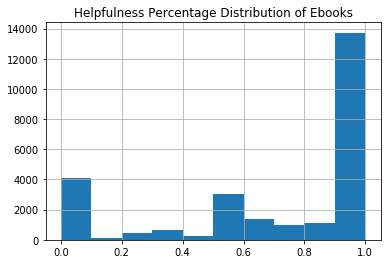

In [60]:
dfs.hist('helpfulness_percentage')
plt.title('Helpfulness Percentage Distribution of Ebooks')

Text(0.5,1,'Helpfulness Percentage Distribution of Books')

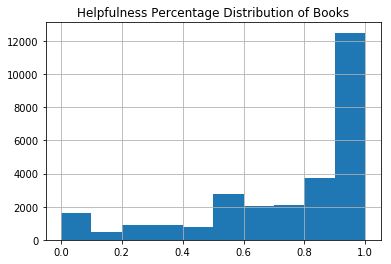

In [61]:
dfs1.hist('helpfulness_percentage')
plt.title('Helpfulness Percentage Distribution of Books')

In [63]:
df1 = percentageebook.groupby('star_rating').avg('helpfulness_percentage')
df1.show()

+-----------+---------------------------+
|star_rating|avg(helpfulness_percentage)|
+-----------+---------------------------+
|       null|                       null|
|          1|         0.5466663582139785|
|          3|         0.5916940171320595|
|          5|         0.7579575829757558|
|          4|         0.7386101786470306|
|          2|         0.5588885464543502|
+-----------+---------------------------+



[Text(0.5,1,'Ebook Distribution of Helpfulness Reviews by Star Rating')]

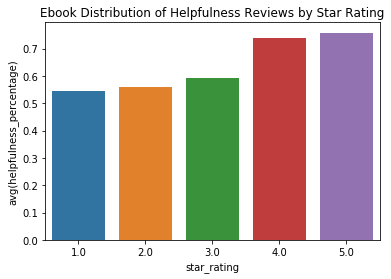

In [67]:
pandasdf1 = df1.toPandas()
sns.barplot(x = 'star_rating', y = 'avg(helpfulness_percentage)', data = pandasdf1).set(title='Ebook Distribution of Helpfulness Reviews by Star Rating')

In [68]:
df2 = percentagebook.groupby('star_rating').avg('helpfulness_percentage')
df2.show()

+-----------+---------------------------+
|star_rating|avg(helpfulness_percentage)|
+-----------+---------------------------+
|       null|                       null|
|          1|         0.5323999005054014|
|          3|         0.6586326560752676|
|          5|         0.7985629418874629|
|          4|         0.7703663514765254|
|          2|         0.6023304955395404|
+-----------+---------------------------+



[Text(0.5,1,'Book Distribution of Helpfulness Reviews by Star Rating')]

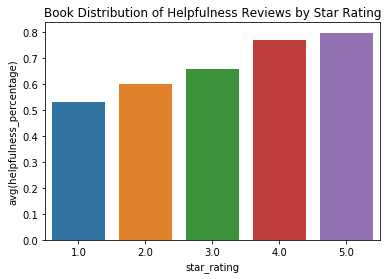

In [69]:
pandasdf2 = df2.toPandas()
sns.barplot(x = 'star_rating', y = 'avg(helpfulness_percentage)', data = pandasdf2).set(title='Book Distribution of Helpfulness Reviews by Star Rating')

## Star Rating & Date Correlations

In [97]:
dfebook.groupBy(year("review_date").alias("year")).agg(mean("star_rating").alias("mean_star_rating")).orderBy(["year"], ascending=[0]).show()

+----+------------------+
|year|  mean_star_rating|
+----+------------------+
|2013| 4.293496950916334|
|2012|4.2150578970821995|
|2011| 4.055387539963709|
|2010|3.8216240563220305|
|2009|3.7769883623738187|
|2008| 3.945872801082544|
|2007|3.9447731755424065|
|2006|               4.0|
|2005|3.5789473684210527|
|2004| 4.538461538461538|
|2003|               5.0|
|2002|3.6666666666666665|
|2001|             4.625|
|2000|               4.0|
|1999|               5.0|
|null| 4.283505154639175|
+----+------------------+



In [98]:
dfbook.groupBy(year("review_date").alias("year")).agg(mean("star_rating").alias("mean_star_rating")).orderBy(["year"], ascending=[0]).show()

+----+------------------+
|year|  mean_star_rating|
+----+------------------+
|2005| 4.149096589635112|
|2004| 4.116753147956809|
|2003| 4.133756962957407|
|2002| 4.166542123941484|
|2001| 4.199580134141298|
|2000| 4.238943079803729|
|1999| 4.212570381789262|
|1998| 4.304548576346079|
|1997| 4.433925157060912|
|1996| 4.602355460385439|
|1995| 4.611111111111111|
|null|4.1937984496124034|
+----+------------------+



## Review & Date Correlations

In [77]:
#By Year
dfebook.groupBy(year("review_date").alias("year")).count().sort("count").orderBy(["count"], ascending=[0]).show()

+----+-------+
|year|  count|
+----+-------+
|2013|3107327|
|2012|1503530|
|2011| 347190|
|2010| 102127|
|2009|  31106|
|2008|   9607|
|2007|    507|
|null|    211|
|2006|     35|
|2005|     19|
|2004|     13|
|2001|      8|
|2000|      6|
|2002|      3|
|1999|      2|
|2003|      2|
+----+-------+



In [78]:
#By Year
dfbook.groupBy(year("review_date").alias("year")).count().sort("count").orderBy(["count"], ascending=[0]).show()

+----+------+
|year| count|
+----+------+
|2000|540476|
|2001|444904|
|2004|440365|
|2003|440007|
|2002|426895|
|2005|405851|
|1999|244559|
|1998|120851|
|1997| 36610|
|1996|  4670|
|1995|   198|
|null|   134|
+----+------+



In [80]:
#By Month
dfebook.groupBy(month("review_date").alias("month")).count().sort("count").orderBy(["month"], descending=[0]).show()

+-----+------+
|month| count|
+-----+------+
| null|   211|
|    1|524785|
|    2|439344|
|    3|506489|
|    4|467108|
|    5|473154|
|    6|476822|
|    7|511711|
|    8|521767|
|    9|327730|
|   10|225214|
|   11|252352|
|   12|375006|
+-----+------+



In [81]:
#By Month
dfbook.groupBy(month("review_date").alias("month")).count().sort("count").orderBy(["month"], descending=[0]).show()

+-----+------+
|month| count|
+-----+------+
| null|   134|
|    1|274964|
|    2|236045|
|    3|269755|
|    4|268434|
|    5|264031|
|    6|275194|
|    7|286483|
|    8|281209|
|    9|254886|
|   10|241695|
|   11|214137|
|   12|238553|
+-----+------+



## Customer & Date Correlation

In [93]:
dfebook.groupBy(year("review_date").alias("year"), "customer_id").count().groupBy("year").count().sort("count").orderBy(["count"], ascending=[0]).show()

+----+-------+
|year|  count|
+----+-------+
|2013|1351508|
|2012| 766741|
|2011| 181527|
|2010|  60861|
|2009|  19737|
|2008|   5828|
|2007|    406|
|null|    180|
|2006|     32|
|2005|     17|
|2004|     12|
|2000|      6|
|2001|      4|
|2002|      3|
|1999|      2|
|2003|      1|
+----+-------+



In [94]:
dfbook.groupBy(year("review_date").alias("year"), "customer_id").count().groupBy("year").count().sort("count").orderBy(["count"], ascending=[0]).show()

+----+------+
|year| count|
+----+------+
|2000|320471|
|2001|249187|
|2004|244222|
|2003|244184|
|2002|234070|
|2005|231150|
|1999|166769|
|1998| 83762|
|1997| 25762|
|1996|  3505|
|1995|   153|
|null|   110|
+----+------+



## Review Body Text EDA

In [6]:
#Seperating Review Text by Star Ratings
dfebooknew = dfebook.withColumn('star_rating_5_reviews', F.when((F.col("star_rating") == 5), F.col('review_body')))
dfebooknew.groupBy("star_rating_5_reviews").count().show()

+---------------------+-----+
|star_rating_5_reviews|count|
+---------------------+-----+
| Este libro de una...|    1|
| I Read it in one ...|    1|
| This book is grea...|    1|
| I loved this book...|    1|
| Greatly enjoyed t...|    1|
| This is an intere...|    1|
| I like her books ...|    1|
| I'm a fan of Lawr...|    1|
| This is a book th...|    1|
| A friend first se...|    1|
| Another winner in...|    1|
| This book joins m...|    1|
| I finished this b...|    1|
| As a convert to t...|    1|
| Sherrilyn has don...|    1|
| Very funny. Lots ...|    1|
| have been slowly ...|    4|
| Cormoran is a gre...|    1|
| In Do No Harm, au...|    1|
| Thunder Point ser...|    1|
+---------------------+-----+
only showing top 20 rows



In [12]:
dfebooknew = dfebooknew.withColumn('star_rating_4_reviews', F.when((F.col("star_rating") == 4), F.col('review_body')))
dfebooknew.groupBy("star_rating_4_reviews").count().show()

+---------------------+-----+
|star_rating_4_reviews|count|
+---------------------+-----+
| This story grips ...|    1|
| Waited for this l...|    1|
| I have always bee...|    1|
| I found the chara...|    1|
| A great read that...|    1|
| This is a book th...|    1|
| A very pleasant s...|    1|
| I give this book ...|    1|
| Tells the story o...|    1|
| Whenever I've bee...|    1|
| I am a long time ...|    1|
| This is a feel go...|    1|
| I must confess I ...|    1|
| Not a new favorit...|    1|
| Love the series, ...|    1|
| Beverly Preston h...|    1|
| Bought this for a...|    1|
| I love this bible...|    1|
| Good romance with...|    1|
| Another difficult...|    1|
+---------------------+-----+
only showing top 20 rows



In [13]:
dfebooknew = dfebooknew.withColumn('star_rating_3_reviews', F.when((F.col("star_rating") == 3), F.col('review_body')))
dfebooknew.groupBy("star_rating_3_reviews").count().show()

+---------------------+-----+
|star_rating_3_reviews|count|
+---------------------+-----+
| This has several ...|    1|
| I waited to read ...|    1|
| Some depth to the...|    1|
| I expected more o...|    1|
| I like the story ...|    1|
| Another reviewer ...|    1|
| A very bleak book...|    1|
| I read this book ...|    1|
| I wish she would ...|    1|
| DELIGHTFUL READIN...|    1|
| This book brings ...|    1|
| I mostly try to f...|    1|
| A well written bo...|    1|
| The underworld to...|    1|
| A bit cliche at t...|    1|
| It starts out kin...|    1|
| This book doesn't...|    1|
| The book causes a...|    1|
| El libro no es ma...|    1|
| I like flawed her...|    1|
+---------------------+-----+
only showing top 20 rows



In [14]:
dfebooknew = dfebooknew.withColumn('star_rating_2_reviews', F.when((F.col("star_rating") == 2), F.col('review_body')))
dfebooknew.groupBy("star_rating_2_reviews").count().show()

+---------------------+-----+
|star_rating_2_reviews|count|
+---------------------+-----+
| Lots of really fu...|    1|
| I agree with some...|    1|
| Thanks to Blum's ...|    1|
| Le dieron demasia...|    1|
| While I think tha...|    1|
| Perhaps I am of t...|    1|
| I'd venture to sa...|    1|
| Initially I was q...|    1|
| Not something I e...|    1|
| I ordered this bo...|    1|
| this story is slo...|    1|
| The author is jus...|    1|
| This is not reall...|    1|
| There was so much...|    1|
| The book is secon...|    1|
| Difficult to foll...|    1|
| Nice to read if y...|    1|
| I usually like th...|    1|
| I did not know th...|    1|
| I finally put it ...|    1|
+---------------------+-----+
only showing top 20 rows



In [15]:
dfebooknew = dfebooknew.withColumn('star_rating_1_reviews', F.when((F.col("star_rating") == 1), F.col('review_body')))
dfebooknew.groupBy("star_rating_1_reviews").count().show()

+---------------------+-----+
|star_rating_1_reviews|count|
+---------------------+-----+
| This book was gli...|    1|
| Sorry guys I hate...|    1|
| Reviewed for Roun...|    1|
| This is the work ...|    1|
| Boring and eviden...|    1|
| The recipes in th...|    1|
| Considering the n...|    1|
| All material in t...|    1|
| To be fair, I lov...|    1|
| Where do I start?...|    1|
| Terrible! I liter...|    1|
| The author is kil...|    1|
| agree with other ...|    1|
| Picked this up fr...|    1|
| I kept reading an...|    1|
| It was bad.  I di...|    1|
| Hugely disappoint...|    1|
| I love science fi...|    1|
| This book was so ...|    1|
| I have read and e...|    1|
+---------------------+-----+
only showing top 20 rows



#### Generating Word Cloud by Star Ratings

In [16]:
sample1 = dfebooknew.select("star_rating_5_reviews","star_rating_4_reviews","star_rating_3_reviews","star_rating_2_reviews","star_rating_1_reviews")

In [29]:
pandasdf1 = sample1.sample(withReplacement=False, fraction=0.001, seed=None).toPandas()

In [30]:
pandasdf1

,star_rating_5_reviews,star_rating_4_reviews,star_rating_3_reviews,star_rating_2_reviews,star_rating_1_reviews
0,None,None,None,None,"Hi, I was unable to complete this book. Didn't..."
1,None,None,"I don't really remember what it was about, its...",None,None
2,Good information about recipes using COCONUT O...,None,None,None,None
3,Le&iacute;do varios libros de esta autora y ha...,None,None,None,None
4,I truly enjoyed this book . Looking forward to...,None,None,None,None
5,"On a different review, I enjoyed the first one...",None,None,None,None
6,The concept of the book was amazing. I liked h...,None,None,None,None
7,None,None,None,None,I used to make it a point to finish every book...
8,Laugh out loud funny! Such a great light summ...,None,None,None,None
9,None,None,First I have to say that TS is one of my favor...,None,None


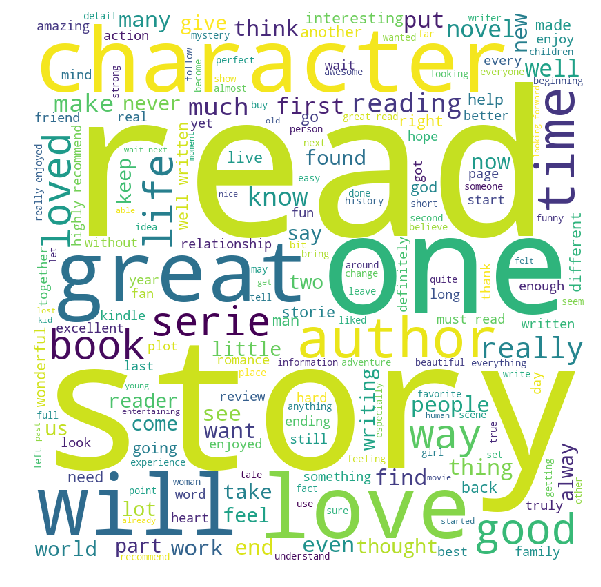

In [31]:
#Star Rating 5 Word Cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

text = ""
stopwords = set(STOPWORDS)
stopwords.add("none")
stopwords.add("book")
stopwords.add("br")
 
# iterate through the file
for val in pandasdf1.star_rating_5_reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    text += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

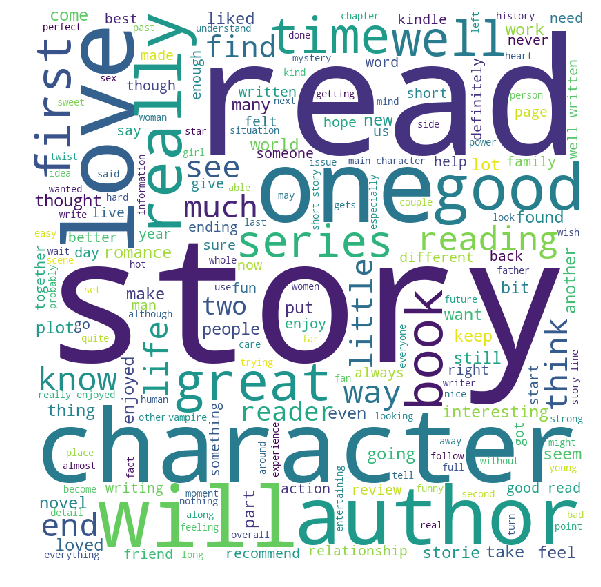

In [32]:
#Star Rating 4 Word Cloud
text = ""
stopwords = set(STOPWORDS)
stopwords.add("none")
stopwords.add("book")
stopwords.add("br")
 
# iterate through the file
for val in pandasdf1.star_rating_4_reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    text += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

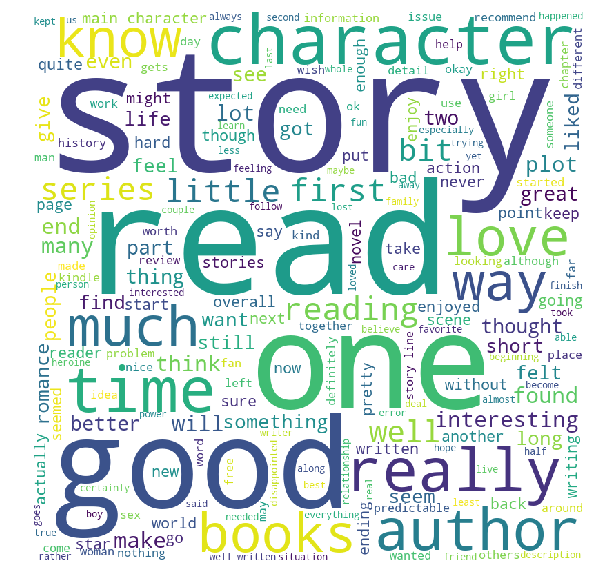

In [33]:
#Star Rating 3 Word Cloud
text = ""
stopwords = set(STOPWORDS)
stopwords.add("none")
stopwords.add("book")
stopwords.add("br")
 
# iterate through the file
for val in pandasdf1.star_rating_3_reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    text += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

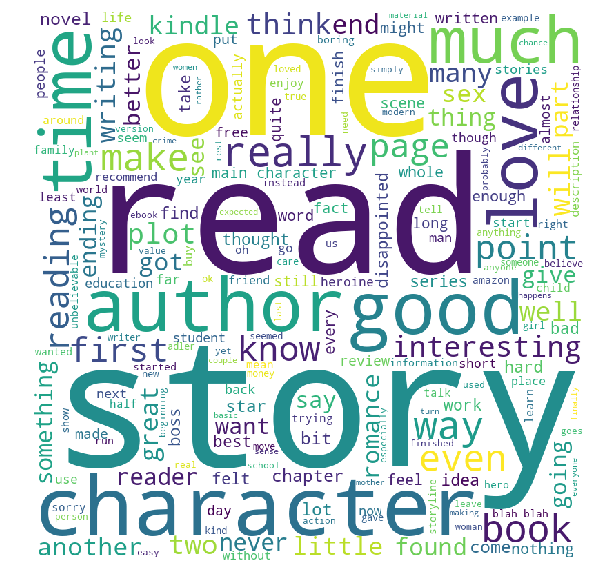

In [36]:
#Star Rating 2 Word Cloud
text = ""
stopwords = set(STOPWORDS)
stopwords.add("none")
stopwords.add("book")
stopwords.add("br")
 
# iterate through the file
for val in pandasdf1.star_rating_2_reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    text += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

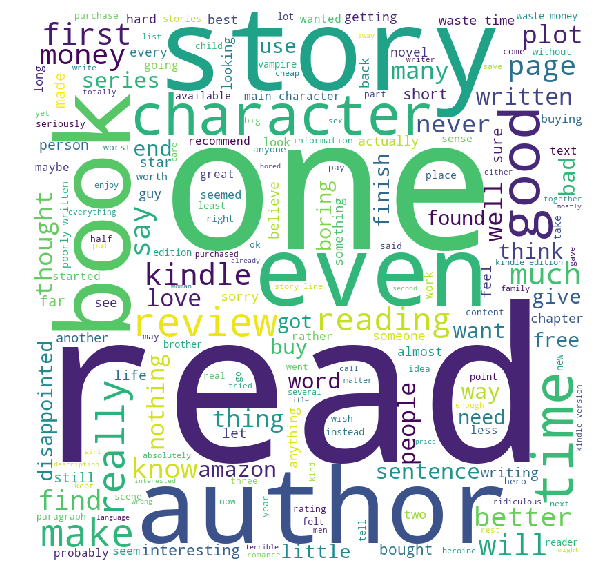

In [37]:
#Star Rating 1 Word Cloud
text = ""
stopwords = set(STOPWORDS)
stopwords.add("none")
stopwords.add("book")
stopwords.add("br")
 
# iterate through the file
for val in pandasdf1.star_rating_1_reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    text += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()